In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\naufa\AppData\Local\Temp\ipykernel_25700\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data/bmd.csv')
data.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [3]:
# Case: Selecting only 2 features
X = data[['age', 'height_cm']].to_numpy()
y = data['bmd'].to_numpy()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_clean = scaler.transform(X)
X_clean.mean(axis=0), X_clean.std(axis=0)

(array([7.88324041e-16, 4.16497868e-16]), array([1., 1.]))

In [5]:
from scratch.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_clean, y)

print('coef', reg.coef_)
print('intercept', reg.intercept_)

coef [-0.0412167   0.04499413]
intercept 0.7831041407692306


Text(0, 0.5, 'predicted')

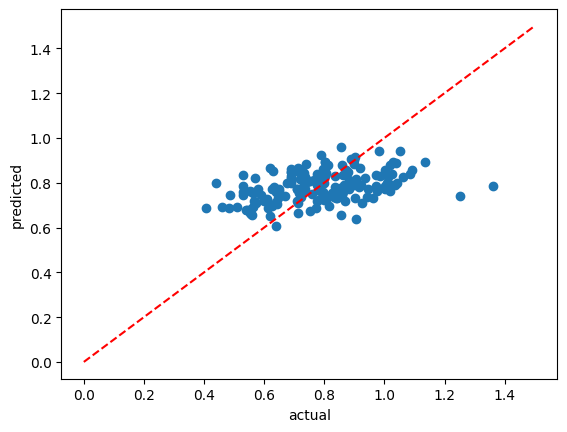

In [6]:
X_ = np.linspace(35, 100, 101).reshape(-1, 1)
y_pred = reg.predict(X_clean)

plt.scatter(y, y_pred)
plt.plot([0, 1.5],[0, 1.5], '--r')
plt.xlabel('actual')
plt.ylabel('predicted')